# Ejercicio 3

**a.**	Determinar en forma aproximada la concentración máxima dada la función c(x, y). Utilizar una precisión de 3 decimales. Transcribir en el .pdf el resultado obtenido en ambos algoritmos.

In [7]:
import random
import numpy as np
import matplotlib.pyplot as plt

class GeneticAlgorithm:
    def __init__(self, population_size, chromosome_length, mutation_rate, crossover_rate, generations, selection_method):
        self.population_size = population_size
        self.chromosome_length = chromosome_length
        self.mutation_rate = mutation_rate
        self.crossover_rate = crossover_rate
        self.generations = generations
        self.selection_method = selection_method
        self.population = []
        self.best_fitness_history = []

    def concentration(self, x, y):
        """Calculate the concentration of the contaminant."""
        return 7.7 + 0.15 * x + 0.22 * y - 0.05 * x**2 - 0.016 * y**2 - 0.007 * x * y

    def fitness(self, chromosome):
        """Calculate the fitness of a chromosome."""
        x_bin, y_bin = chromosome[:self.chromosome_length // 2], chromosome[self.chromosome_length // 2:]
        x = int(x_bin, 2)
        y = int(y_bin, 2)

        # Scale x and y to their respective ranges
        x = -10 + (20 * x) / (2**(self.chromosome_length // 2) - 1)
        y = 0 + (20 * y) / (2**(self.chromosome_length // 2) - 1)

        return self.concentration(x, y)

    def initialize_population(self):
        """Initialize the population with random chromosomes."""
        self.population = [''.join(random.choice('01') for _ in range(self.chromosome_length)) for _ in range(self.population_size)]

    def select_parent(self):
        """Select a parent using the specified selection method."""
        if self.selection_method == 'roulette':
            total_fitness = sum(self.fitness(ind) for ind in self.population)
            selection_point = random.uniform(0, total_fitness)
            current_fitness = 0
            for individual in self.population:
                current_fitness += self.fitness(individual)
                if current_fitness >= selection_point:
                    return individual
        elif self.selection_method == 'tournament':
            tournament_size = 2
            tournament = random.sample(self.population, tournament_size)
            return max(tournament, key=self.fitness)

    def crossover(self, parent1, parent2):
        """Perform crossover between two parents."""
        if random.random() < self.crossover_rate:
            point = random.randint(1, self.chromosome_length - 1)
            return parent1[:point] + parent2[point:], parent2[:point] + parent1[point:]
        return parent1, parent2

    def mutate(self, chromosome):
        """Perform mutation on a chromosome."""
        return ''.join(bit if random.random() > self.mutation_rate else str(1 - int(bit)) for bit in chromosome)

    def run(self):
        """Run the genetic algorithm."""
        self.initialize_population()

        for generation in range(self.generations):
            new_population = []
            for _ in range(self.population_size // 2):
                parent1 = self.select_parent()
                parent2 = self.select_parent()
                offspring1, offspring2 = self.crossover(parent1, parent2)
                new_population.append(self.mutate(offspring1))
                new_population.append(self.mutate(offspring2))

            self.population = new_population
            best_individual = max(self.population, key=self.fitness)
            best_fitness = self.fitness(best_individual)
            self.best_fitness_history.append(best_fitness)

            print(f"Generation {generation + 1}: Best Fitness = {best_fitness:.3f}")

        return best_individual, best_fitness

    def plot_convergence(self):
        """Plot the convergence of fitness values over generations."""
        plt.plot(self.best_fitness_history, label=self.selection_method.capitalize())
        plt.title('Best Fitness by Generation')
        plt.xlabel('Generation')
        plt.ylabel('Best Fitness')
        plt.legend()
        plt.grid()
        
    def plot_concentration(self, best_individual, title='Concentration of Contaminant c(x, y)', label='Best Found'):
        """Plot the concentration of the contaminant in 3D."""
        x_bin, y_bin = best_individual[:self.chromosome_length // 2], best_individual[self.chromosome_length // 2:]
        x = -10 + (20 * int(x_bin, 2)) / (2**(self.chromosome_length // 2) - 1)
        y = 0 + (20 * int(y_bin, 2)) / (2**(self.chromosome_length // 2) - 1)

        # Create a grid for the concentration function
        X = np.linspace(-10, 10, 400)
        Y = np.linspace(0, 20, 400)
        X, Y = np.meshgrid(X, Y)
        Z = self.concentration(X, Y)

        # Plotting the concentration surface
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7)
        ax.scatter(x, y, self.concentration(x, y), color='red', s=100, label=label)
        ax.set_title(title)
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('Concentration')
        ax.legend()
        plt.show()

In [2]:
# Parameters
POPULATION_SIZE = 10
CHROMOSOME_LENGTH = 32  # 16 bits for x and 16 bits for y
MUTATION_RATE = 0.1
CROSSOVER_RATE = 0.92
GENERATIONS = 15

Running Genetic Algorithm with Roulette Selection:
Generation 1: Best Fitness = 8.471
Generation 2: Best Fitness = 8.480
Generation 3: Best Fitness = 8.414
Generation 4: Best Fitness = 8.481
Generation 5: Best Fitness = 8.259
Generation 6: Best Fitness = 7.776
Generation 7: Best Fitness = 8.089
Generation 8: Best Fitness = 8.388
Generation 9: Best Fitness = 8.389
Generation 10: Best Fitness = 8.318
Generation 11: Best Fitness = 8.075
Generation 12: Best Fitness = 8.149
Generation 13: Best Fitness = 8.012
Generation 14: Best Fitness = 8.078
Generation 15: Best Fitness = 8.361
Best Solution (Roulette): Fitness = 8.361


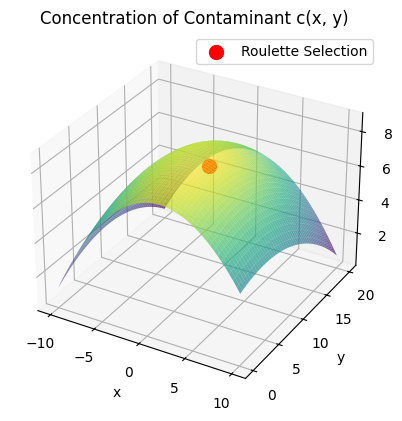

In [8]:
# Run Genetic Algorithm with Roulette Selection
print("Running Genetic Algorithm with Roulette Selection:")
ga_roulette = GeneticAlgorithm(POPULATION_SIZE, CHROMOSOME_LENGTH, MUTATION_RATE, CROSSOVER_RATE, GENERATIONS, 'roulette')
best_individual_roulette, best_fitness_roulette = ga_roulette.run()
print(f"Best Solution (Roulette): Fitness = {best_fitness_roulette:.3f}")
ga_roulette.plot_concentration(best_individual_roulette, label='Roulette Selection') 


Running Genetic Algorithm with Tournament Selection:
Generation 1: Best Fitness = 8.128
Generation 2: Best Fitness = 8.236
Generation 3: Best Fitness = 8.240
Generation 4: Best Fitness = 8.336
Generation 5: Best Fitness = 8.460
Generation 6: Best Fitness = 8.276
Generation 7: Best Fitness = 8.253
Generation 8: Best Fitness = 8.264
Generation 9: Best Fitness = 8.309
Generation 10: Best Fitness = 8.499
Generation 11: Best Fitness = 8.417
Generation 12: Best Fitness = 8.502
Generation 13: Best Fitness = 8.504
Generation 14: Best Fitness = 8.504
Generation 15: Best Fitness = 8.506
Best Solution (Tournament): Fitness = 8.506


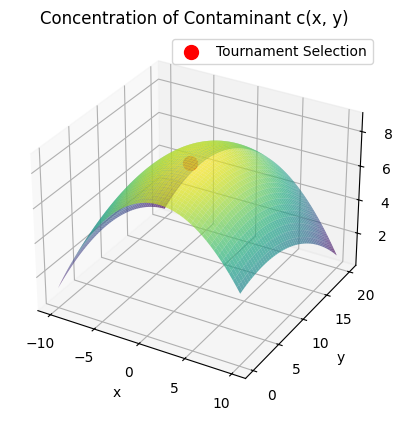

In [9]:
# Run Genetic Algorithm with Tournament Selection
print("\nRunning Genetic Algorithm with Tournament Selection:")
ga_tournament = GeneticAlgorithm(POPULATION_SIZE, CHROMOSOME_LENGTH, MUTATION_RATE, CROSSOVER_RATE, GENERATIONS, 'tournament')
best_individual_tournament, best_fitness_tournament = ga_tournament.run()
print(f"Best Solution (Tournament): Fitness = {best_fitness_tournament:.3f}")
ga_tournament.plot_concentration(best_individual_tournament, label='Tournament Selection')

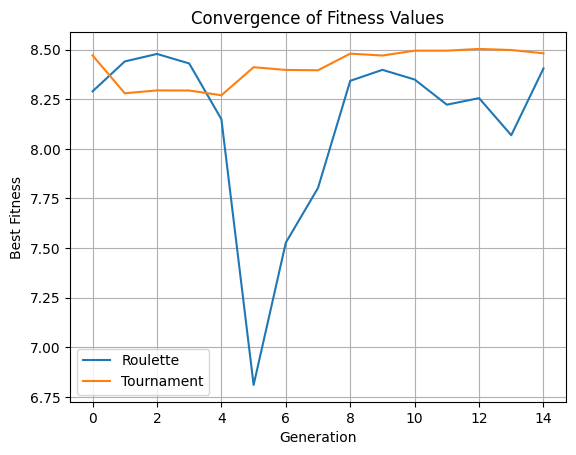

In [5]:
# Plotting the convergence
plt.figure()
ga_roulette.plot_convergence()
ga_tournament.plot_convergence()
plt.title('Convergence of Fitness Values')
plt.xlabel('Generation')
plt.ylabel('Best Fitness')
plt.legend()
plt.grid()
plt.show()